<a href="https://colab.research.google.com/github/isaacmoore/random_analysis/blob/master/Question%206/Scrape_the_IMDB_Top_250_Movies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
import matplotlib.pyplot as plturl = 'https://www.imdb.com/search/title/?groups=top_250&sort=user_rating,desc&start='
starter = ['1','51','101','151','201']

In [0]:
movie_list = []
movie_rank = []
movie_year = []
movie_rating = []
movie_metascore = []
movie_n_votes = []
movie_rated = []
movie_runtime = []

for x in starter:
  page = requests.get(url+x)
  soup = BeautifulSoup(page.content, "html.parser")
  movie_containers = soup.find_all('div', class_ = 'lister-item mode-advanced')

  for i in range(len(movie_containers)):
    movie = movie_containers[i]
    #Movie Name
    movie_list.append(movie.h3.a.text)
    #Rank
    movie_rank.append(movie.h3.span.text)
    #Year
    a = movie.h3
    movie_year.append(a.find_all('span', class_ = 'lister-item-year text-muted unbold')[0].text)
    #Rating
    movie_rating.append(movie.strong.text)
    #Metascore
    if len(movie.find_all('div', class_ = 'inline-block ratings-metascore')) == 0:
      movie_metascore.append(np.NaN)
    else:
      mscore = movie.find_all('div', class_ = 'inline-block ratings-metascore')[-1]
      movie_metascore.append(int(mscore.span.text))
    #Number of Votes
    votes = movie.find('span', attrs = {'name':'nv'})
    movie_n_votes.append(int(votes['data-value']))
    #Rated -- do an if/else; some movies might not have a rating
    if len(movie.find_all(class_ ='certificate')) ==0:
      movie_rated.append(np.NaN)
    else:
      rated = movie.find_all(class_ ='certificate')
      movie_rated.append(rated[-1].text)
    #Runtime
    movie_runtime.append(movie.find(class_ ='runtime').text)


In [4]:
print(len(movie_rated))

250


In [5]:
movie_containers[14].find(class_ ='runtime').text

'128 min'

In [6]:
#=== Creating the dataframe ===
df = pd.DataFrame({'rank':movie_rank,'name':movie_list,'year':movie_year,'rating':movie_rating,'metascore':movie_metascore,'n_votes':movie_n_votes,'rated':movie_rated,'runtime':movie_runtime})
df.tail()

,rank,name,year,rating,metascore,n_votes,rated,runtime
245,246.,"Monsters, Inc.",(2001),8.0,78.0,761126,G,92 min
246,247.,Aladdin,(1992),8.0,86.0,338654,G,90 min
247,248.,Castle in the Sky,(1986),8.0,78.0,131809,PG,125 min
248,249.,The Terminator,(1984),8.0,84.0,752802,R,107 min
249,250.,Butch Cassidy and the Sundance Kid,(1969),8.0,66.0,191437,PG,110 min


In [0]:
#=== Cleaning the dataframe ===
df['year'] = df.year.str.replace('(','').str.replace(')','')
df['year'] = df.year.str.replace('I ','')
df['year'] = df.year.astype(int)
df['rating'] = df.rating.astype(float)
df['runtime'] = df.runtime.str.replace(' min', '')
df['runtime'] = df.runtime.astype(int)
df['rated'] = df.rated.str.replace('GP', 'PG')

In [8]:
df.runtime.describe()

count    250.000000
mean     130.768000
std       33.164464
min       45.000000
25%      108.250000
50%      127.000000
75%      147.750000
max      321.000000
Name: runtime, dtype: float64

In [9]:
df.head(25)

,rank,name,year,rating,metascore,n_votes,rated,runtime
0,1.,The Shawshank Redemption,1994,9.3,80.0,2162107,R,142
1,2.,The Godfather,1972,9.2,100.0,1483950,R,175
2,3.,The Dark Knight,2008,9.0,84.0,2137023,PG-13,152
3,4.,The Godfather: Part II,1974,9.0,90.0,1033375,R,202
4,5.,The Lord of the Rings: The Return of the King,2003,8.9,94.0,1535233,PG-13,201
5,6.,Pulp Fiction,1994,8.9,94.0,1697142,R,154
6,7.,Schindler's List,1993,8.9,94.0,1121611,R,195
7,8.,12 Angry Men,1957,8.9,96.0,618485,Not Rated,96
8,9.,Joker,2019,8.8,59.0,486933,R,122
9,10.,Inception,2010,8.8,74.0,1895111,PG-13,148


## EDA

Movie with the worst metascore

In [10]:
df[(df.metascore == df.metascore.min())]

,rank,name,year,rating,metascore,n_votes,rated,runtime
90,91.,Snatch,2000,8.3,55.0,735199,R,102


Movie with the most number of votes

In [11]:
df[(df.n_votes == df.n_votes.max())]

,rank,name,year,rating,metascore,n_votes,rated,runtime
0,1.,The Shawshank Redemption,1994,9.3,80.0,2162107,R,142


100 Metascore Scored movies

In [12]:
print(df[(df.metascore == 100)])
print('\n')
print(df[(df.metascore == 100)].year.describe())

     rank                name  year  ...  n_votes     rated  runtime
1      2.       The Godfather  1972  ...  1483950         R      175
51    52.          Casablanca  1942  ...   488240        PG      102
79    80.         Rear Window  1954  ...   410954        PG      112
111  112.  Lawrence of Arabia  1962  ...   249245  Approved      228
114  115.             Vertigo  1958  ...   331296        PG      128
119  120.        Citizen Kane  1941  ...   372297        PG      119

[6 rows x 8 columns]


count       6.000000
mean     1954.833333
std        11.940128
min      1941.000000
25%      1945.000000
50%      1956.000000
75%      1961.000000
max      1972.000000
Name: year, dtype: float64


Above average movies, by metascore

In [13]:
print(df[df.metascore > df.metascore.mean()])
print('\n')
print(df.metascore.describe())

     rank                                           name  ...      rated  runtime
1      2.                                  The Godfather  ...          R      175
2      3.                                The Dark Knight  ...      PG-13      152
3      4.                         The Godfather: Part II  ...          R      202
4      5.  The Lord of the Rings: The Return of the King  ...      PG-13      201
5      6.                                   Pulp Fiction  ...          R      154
..    ...                                            ...  ...        ...      ...
240  241.                             Gone with the Wind  ...     Passed      238
241  242.                          It Happened One Night  ...  Not Rated      105
244  245.                                  Before Sunset  ...          R       80
246  247.                                        Aladdin  ...          G       90
248  249.                                 The Terminator  ...          R      107

[114 rows x 8 c

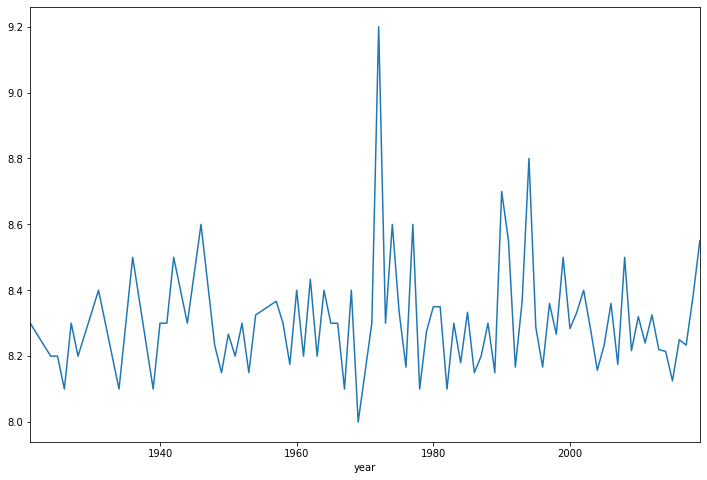

In [14]:
df.groupby('year').rating.mean().plot(figsize=[12,8])

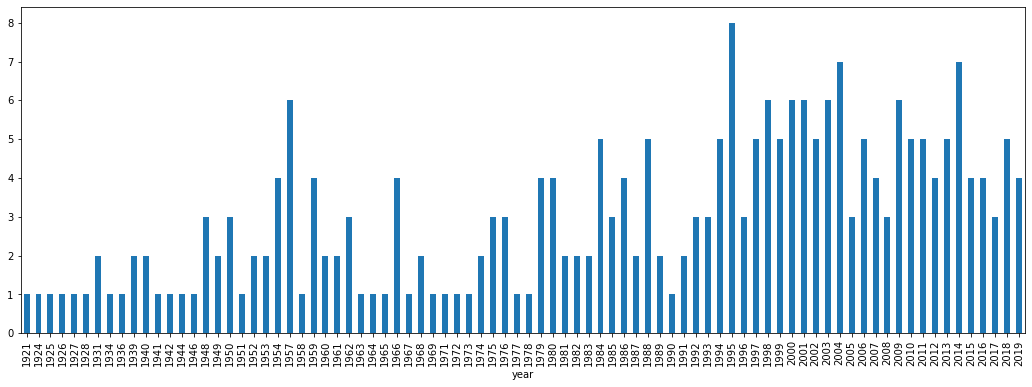

In [15]:
df.groupby('year').name.count().plot(kind='bar',figsize=[18,6])

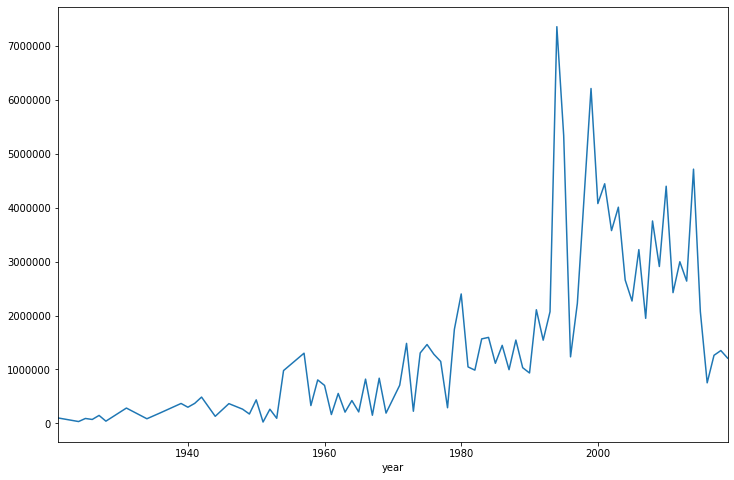

In [16]:
df.groupby('year').n_votes.sum().plot(figsize=[12,8])

[Text(0, 0.5, 'Maetascore'), Text(0.5, 0, 'Rating')]

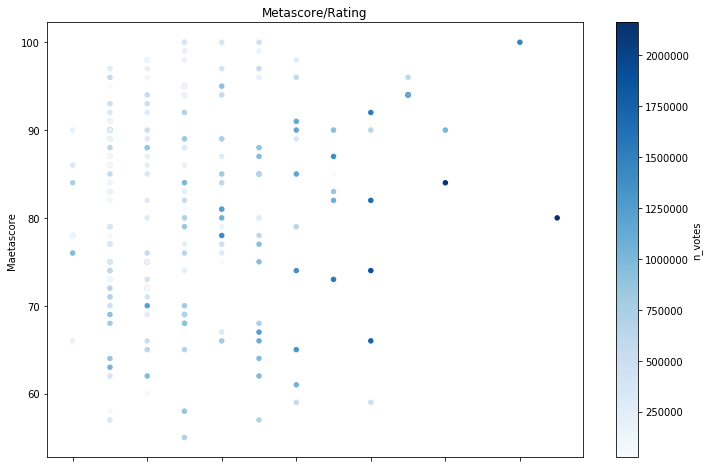

In [17]:
ax = df.plot.scatter(x='rating',y='metascore',c='n_votes',colormap='Blues',title='Metascore/Rating',figsize=[12,8])
ax.set(xlabel='Rating', ylabel='Maetascore')
#ax.set_ylabel('Maetascore')

In [47]:
df.groupby('rated').describe()

year                                  ... runtime                      
           count         mean        std     min  ...     25%    50%     75%    max
rated                                             ...                              
Approved     1.0  1962.000000        NaN  1962.0  ...  228.00  228.0  228.00  228.0
G           14.0  1981.857143  27.430632  1931.0  ...   87.25   92.5  102.25  212.0
Not Rated   53.0  1965.094340  27.640734  1921.0  ...   98.00  125.0  143.00  321.0
PG          36.0  1984.166667  21.291850  1941.0  ...  102.75  117.0  125.50  224.0
PG-13       30.0  2005.000000  10.579746  1968.0  ...  130.00  140.5  161.00  201.0
Passed       6.0  1941.166667   8.588752  1926.0  ...  111.50  125.5  135.00  238.0
R          108.0  1996.138889  13.893089  1960.0  ...  116.75  130.5  150.25  229.0
TV-MA        1.0  1996.000000        NaN  1996.0  ...  128.00  128.0  128.00  128.0

[8 rows x 40 columns]

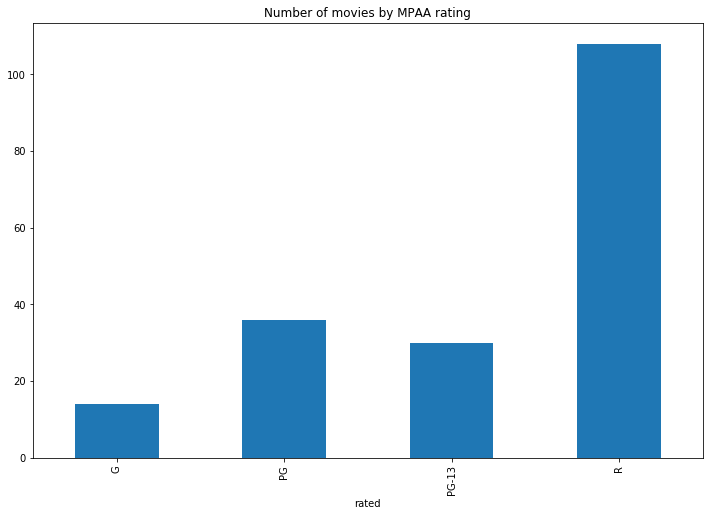

In [58]:
df[df.rated.isin(['G','GP','PG','PG-13','R'])].groupby('rated').name.count().plot(kind='bar',figsize=[12,8],title='Number of movies by MPAA rating')

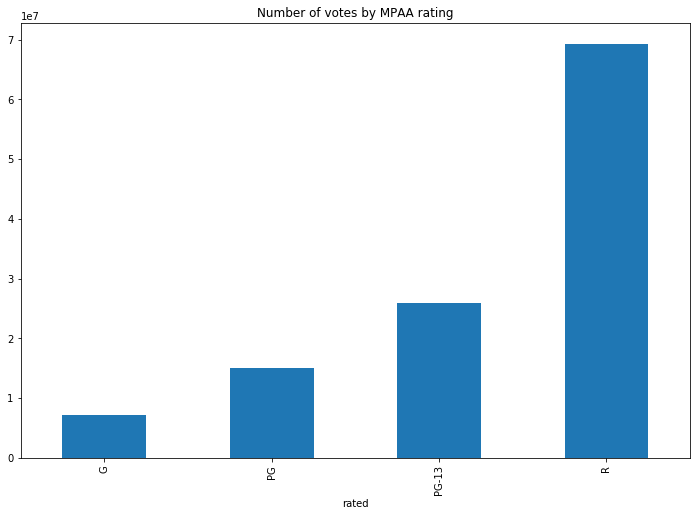

In [60]:
df[df.rated.isin(['G','GP','PG','PG-13','R'])].groupby('rated').n_votes.sum().plot(kind='bar', figsize=[12,8],title='Number of votes by MPAA rating')

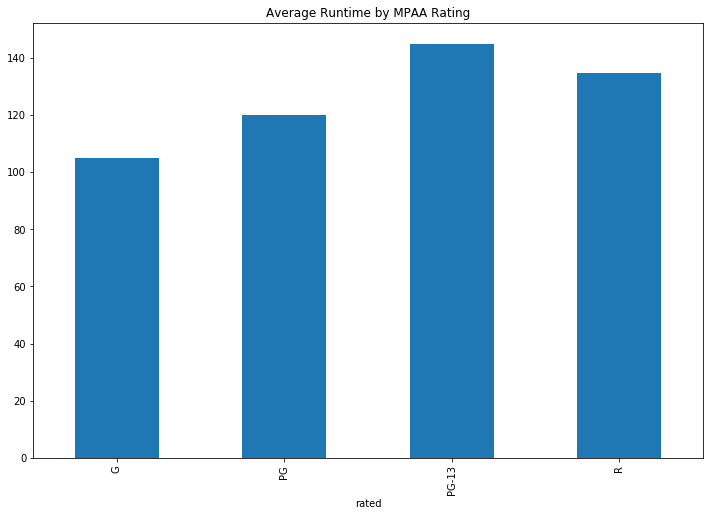

In [61]:
df[df.rated.isin(['G','GP','PG','PG-13','R'])].groupby('rated').runtime.mean().plot(kind='bar', figsize=[12,8],title='Average Runtime by MPAA Rating')

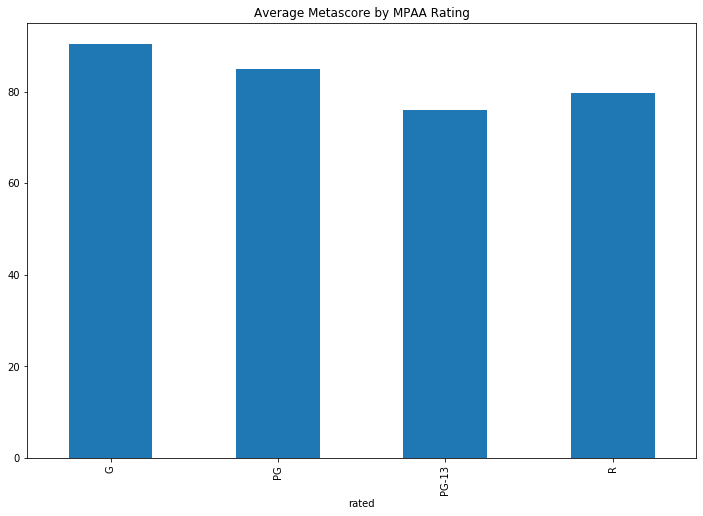

In [62]:
df[df.rated.isin(['G','GP','PG','PG-13','R'])].groupby('rated').metascore.mean().plot(kind='bar', figsize=[12,8],title='Average Metascore by MPAA Rating')

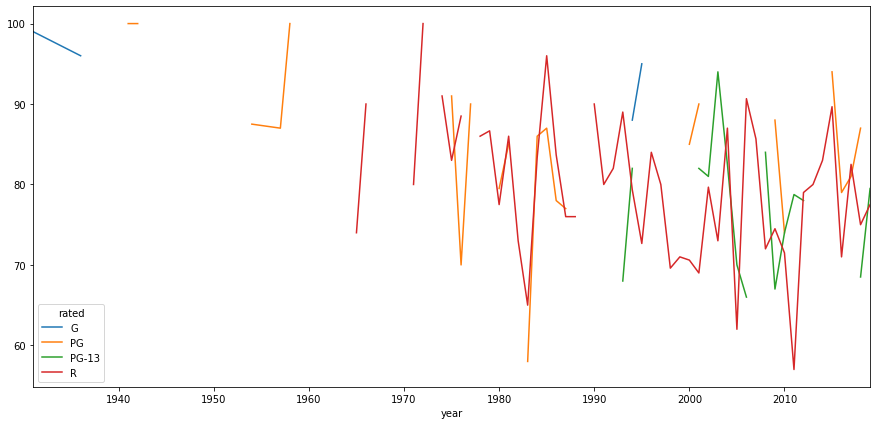

In [67]:
# plot data
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
#data.groupby(['date','type']).count()['amount'].unstack().plot(ax=ax)
df[df.rated.isin(['G','GP','PG','PG-13','R'])].groupby(['year','rated']).metascore.mean().unstack().plot(ax=ax,kind='line')

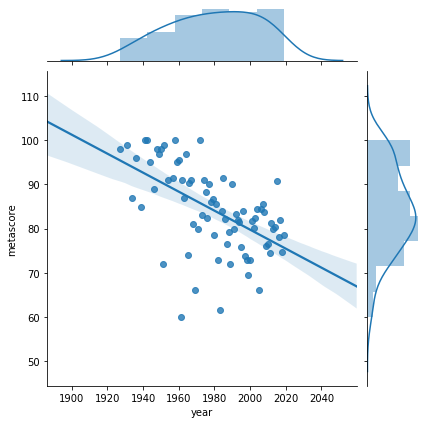

In [88]:
ax = df.groupby('year').metascore.mean()
sns.jointplot(x=ax.index, y=ax, kind='reg')